# TP 2 Morphomathématiques-Convolution-Détection de caractéristiques-

In [46]:
import skimage
import skimage.io as io
import skimage.filters as filters
from skimage import feature, transform

import numpy as np
import skimage.color as color
import matplotlib.pyplot as plt


# Morphomathématiques 

# Exercice 1

1. Chargez et affichez l'image cell.png.

OK

2. Nettoyez l'image en enlevant les petits grains blancs et les points noirs situés sur les cellules (formes en blanc).

OK

# Exercice 2

L’objectif de cet exercice est de trouver puis de compter le nombre de piscines visibles dans l’image satellitaire moliets.png. Dans un premier temps, ne cherchez pas à trouver parfaitement toutes les piscines : implémentez une première méthode qui donne un résultat approximatif de manière automatique. La plupart des fonctions utiles sont à importer depuis le module skimage.morphology

1. Appliquez un seuillage sur l’image pour mettre en évidence les piscines. Posez-vous la question de l’image à utiliser : vaut-il mieux travailler avec l’image initiale, l’image en niveau de gris, une bande particulière ?

OK

2. Appliquez les opérateurs morphologiques vus en cours (érosion, dilatation, ouverture, fermeture) pour observer leur influence et en déduire l’opérateur le plus adapté au problème.


OK

3. Que permet de faire la fonction skimage.measure.regionprops ? En quoi peut-elle être utile pour compter le nombre de piscines ? Déterminer automatiquement le nombre de piscines


OK

# Convolution

# Exercice 1 

1 : Affichez la convolution entre l'image smiley.png avec un noyau gaussien en utilisant skimage.filters.gaussian

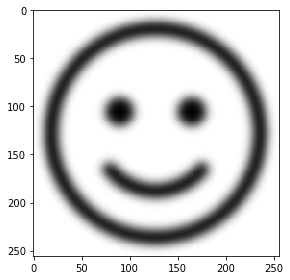

In [47]:
image = io.imread("smiley.png")

# Le sigma contrôle la taille de la zone de flou
sigma = 5.0
img_filtered = filters.gaussian(image, sigma=sigma)

# Afficher l'image filtrée
io.imshow(img_filtered)
io.show()


2 : Soit un noyau défini par $h =[1, -1]$. Compléter le code ci-dessous  en utilisant scipy.ndimage.convolve afin d'afficher la convolution de l'image smiley avec  le noyau $h$

L'image convertit en tableau vaut:
 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]] 

La convolution de l'image vaut:
 [[0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 2]
 ...
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 2]]


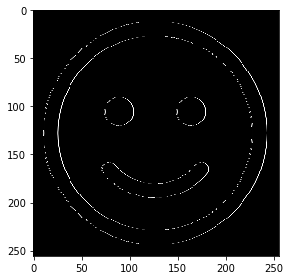

In [48]:
from scipy import ndimage
from PIL import Image
from numpy import asarray

h = np.array([[1, -1]])
# print(h)
image_smiley = io.imread("smiley.png")
# On convertit l'image en tableau
numpydata = asarray(image_smiley)
# On affiche le tableau
print("L'image convertit en tableau vaut:\n", numpydata, "\n")

# On effectue la convolution
convolution = ndimage.convolve(numpydata, h, mode='constant', cval=1.0)
print("La convolution de l'image vaut:\n", convolution)

# Affichage
io.imshow(convolution)
io.show()


3 : Puis avec un noyau défini par un vecteur de taille 30 dont les éléments valent 1/30 (généré  avec numpy.ones)

L'image convertit en tableau vaut:
 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]] 

La convolution de l'image vaut:
 [[136 144 153 ... 144 136 127]
 [136 144 153 ... 144 136 127]
 [136 144 153 ... 144 136 127]
 ...
 [136 144 153 ... 144 136 127]
 [136 144 153 ... 144 136 127]
 [136 144 153 ... 144 136 127]]


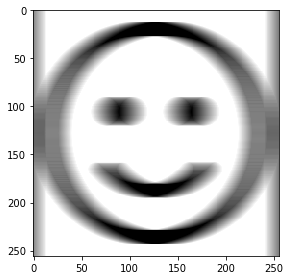

In [49]:
from scipy import ndimage
from numpy import asarray

h2 = np.ones(30)/30
h2 = np.array([h2]) 
# print(h2, "\n")

image_smiley2 = io.imread("smiley.png")
numpydata2 = asarray(image_smiley2)
# On affiche le tableau
print("L'image convertit en tableau vaut:\n", numpydata2, "\n")

# On effectue la convolution
convolution2 = ndimage.convolve(numpydata2, h2, mode='constant', cval=1.0)
print("La convolution de l'image vaut:\n", convolution2)

# Affichage
io.imshow(convolution2)
io.show()


# Exercice 2 : Méthodes de Sobel et de Canny


1. Utilisez skimage.filters.sobel pour afficher les gradients de l’image "L.png" calculés avec la méthode
de Sobel.


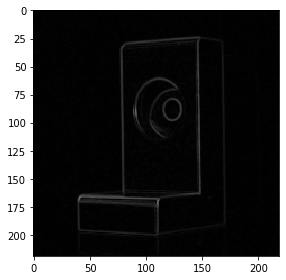

In [50]:
imgage_L = io.imread("L.png", as_gray=True)

# Calculer les gradients avec la méthode de Sobel
sobel = filters.sobel(imgage_L)

# Afficher les gradients
io.imshow(sobel)
io.show()


2 . Appliquez un seuil sur l’image obtenue pour effectuer une première détection de contours.
Comment évolue cette détection lorsque le seuil varie ?

Seuil d'Otsu: 0.08348679534707372
Seuil optimal: 0.08348679534707372


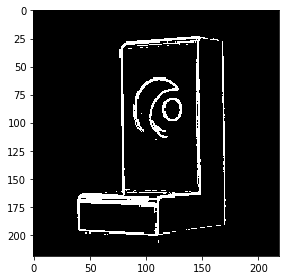

In [51]:
thresh = filters.threshold_otsu(sobel)
print("Seuil d'Otsu:", thresh)
thresh_bis = thresh - 0.025
print("Seuil optimal:", thresh)
binary = sobel > thresh_bis

# Afficher l'image seuillée
io.imshow(binary)
io.show()


0.08348679534707372


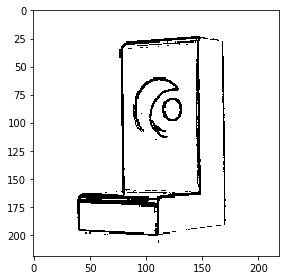

In [52]:
thresh = filters.threshold_otsu(sobel)
print(thresh)
binary = sobel < thresh_bis

# Afficher l'image seuillée
io.imshow(binary)
io.show()


On constate bien que les contours ont été détectés.
Remarque : on peut afficher l'image binarisée en dessous (<) du seuil (thresh) ou au dessus (>). Seul les couleurs changent.
Cette détection varie lorsque le seuil change (contours effacés ou grossiers).

3. Estimez le seuil optimal, c’est-à-dire celui qui permettra d’obtenir le plus de contours de l’objet
tout en conservant des contours les plus précis possibles.

In [53]:
print("Le seuil vaut:", thresh_bis)


Le seuil vaut: 0.05848679534707372


On arrive à être le plus précis possible en affichant tous les contours sans trop exagéré, c'est à dire sans rendre les contours
trop grossiers.

Le seuil optimal semble être entre 10 et 15.

4. Utilisez skimage.feature.canny pour afficher les contours détectés par la méthode de Canny. Observez l’influence du filtre gaussien.


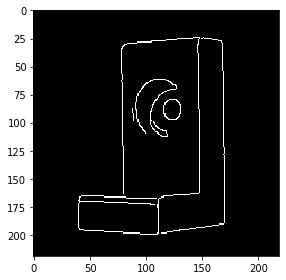

In [54]:
imgage_L = io.imread("L.png", as_gray=True)

# Appliquer un filtre gaussien pour réduire le bruit
imgage_filtre = filters.gaussian(imgage_L, sigma=1)

# Détecter les contours avec la méthode de Canny
contours = feature.canny(imgage_filtre, sigma=1)

# Afficher les contours détectés
io.imshow(contours)
io.show()


Avec Sigma = 1

Le filtre de canny cherche les contours optimaux et non simplement les gradients comme dans le cas du filtre de Sobel.
Le filtre de canny essaie de garantir la continuité du contour. Pour sigma =2 le résultat semble satisfaisant même s il demeure quelques artéfacts.
Pour sigma=3 nous perdons le contous de l arrière plan.

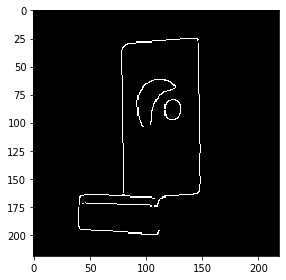

In [55]:
imgage_L = io.imread("L.png", as_gray=True)

# Appliquer un filtre gaussien pour réduire le bruit
imgage_filtre = filters.gaussian(imgage_L, sigma=1)

# Détecter les contours avec la méthode de Canny
contours = feature.canny(imgage_filtre, sigma=3)

# Afficher les contours détectés
io.imshow(contours)
io.show()


Avec Sigma = 3

#  Exercice Complémentaire : Méthode de Harris



1. Appliquez la méthode de Harris sur l’image L.png pour détecter les coins. Utilisez pour cela les
méthodes skimage.feature.corner_harris.

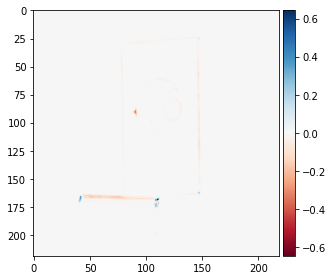

In [56]:
imgage_L = io.imread("L.png")

# Détecter les coins avec la méthode de Harris
harris = feature.corner_harris(imgage_L)

# Afficher les coins détectés
io.imshow(harris)
io.show()


2. Critiquez le résultat obtenu : les coins ont-ils bien tous été détectés ? Y a-t-il des fausses alarmes
(c’est-à-dire des détections qui ne correspondent pas à des points) ? Comment expliquer ces
erreurs ?

Cette méthode n'est pas optimale. En effet, certains coins ne sont pas détectés.
Cette méthode peut par contre, détecter des coins faux positifs.

Certains constrastes ne correspondent pas à des véritables coins pais à de surbrillances liées à léclairement.
Certain coins ne sont ne sont pas détectés car le gradient entre le fond et l objet n est pas suffisamment marqué.

#  Exercice Complémentaire : Transformée de Hough



1. La transformée de Hough ne s’applique pas directement sur l’image originale L.png : quelle image
utilisez-vous ? Représentez la transformée de Hough de l’image avec skimage.transform.hough_line.



La taille de l'image: (219, 219)


c:\Users\jbben\AppData\Local\Programs\Python\Python39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


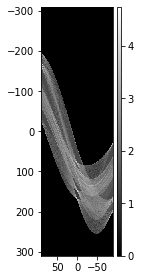

In [57]:
imgage_L = io.imread("L.png", as_gray=True)
print("La taille de l'image:", imgage_L.shape)

# Détecter les contours avec la méthode de Canny
contours = feature.canny(imgage_L, sigma=1)


h, theta, d = transform.hough_line(contours)

# Afficher la transformée de Hough
io.imshow(np.log(1 + h), extent=[np.rad2deg(theta[-1]),
          np.rad2deg(theta[0]), d[-1], d[0]], cmap='gray', aspect=1/1.0)
io.show()


2. La fonction skimage.transform.hough_line_peaks permet d’extraire de la transformée de
Hough les paramètres des lignes les plus importantes. Utilisez cette fonction pour affichez les 
lignes les plus importantes de l’image

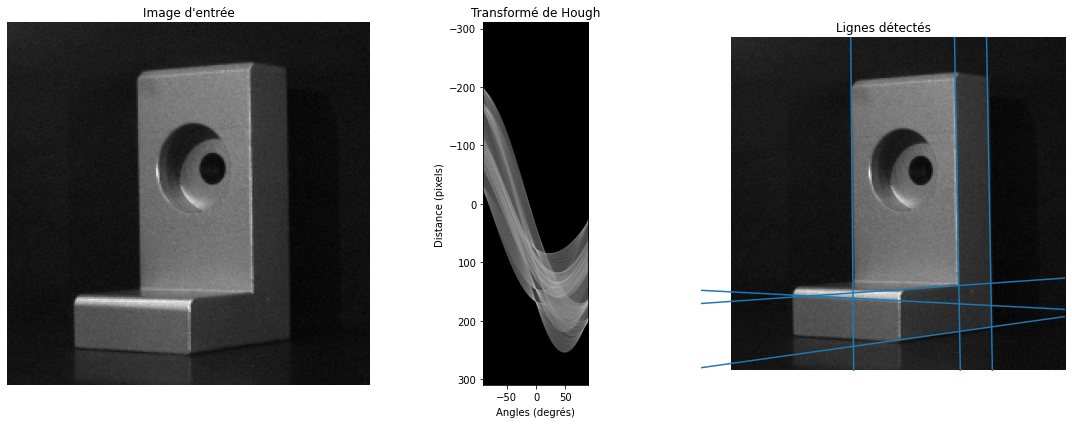

In [58]:
image = io.imread("L.png", as_gray=True)
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)

contours = feature.canny(imgage_L, sigma=1)
h, theta, d = transform.hough_line(contours, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Image d'entrée")
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
ax[1].imshow(np.log(1 + h), extent=bounds, cmap='gray', aspect=1 / 1.5)
ax[1].set_title("Transformé de Hough")
ax[1].set_xlabel("Angles (degrés)")
ax[1].set_ylabel("Distance (pixels)")
ax[1].axis("Image")

ax[2].imshow(image, cmap='gray')
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title("Lignes détectés")

for _, angle, dist in zip(*transform.hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2))

plt.tight_layout()
plt.show()


On constate bien sur la dernière image que les lignes les plus importantes sont bien détectées.